# Project 2 : Rejection and Independence
### Author: Ishan Mohanty
### USC ID: 4461-3447-18
### NET ID: imohanty
### Email: imohanty@usc.edu

### /###################################################################################/

In [516]:
'''
####################################################
EE 511 : Simulation Methods of Stochastic Systems
Author: Ishan Mohanty
USC ID: 4461-3447-18
NET ID: imohanty
Email: imohanty@usc.edu
####################################################
'''

#import libraries

import numpy as np
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import poisson
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

## Q1: Double Rejection 

The random variable X has a bimodal distribution made up of an equally weighted, convex summation of a beta and a triangle distribution:
\begin{align}
\ 𝑓(𝑥) = 0.5 × 𝐵𝑒𝑡𝑎(8,5), 0 < 𝑥 ≤ 1 \\
         0.5 × (𝑥 − 4), 4 < 𝑥 ≤ 5 \\
        −0.5 × (𝑥 − 6), 5 < 𝑥 ≤ 6 \\
         0, 𝑒𝑙𝑠𝑒 
\end{align}

Implement rejection sampling routines for X. Generate 1000 samples of the random variable using each envelope. Track the rejection rate of your rejection sampling RNGs. The rejection rate is the average number of rejected candidates per sample. This is a measure of the efficiency of your RNG.

### Target PDF

In [517]:
"""
Generate samples from the target pdf of the random variable X which is a bimodal distribution.
@param x: real number values from number line
       a: alpha value for beta distribution
       b: beta value for beta distribution
@return fx: function fx which has samples belonging to random variable X 
"""
def target_pdf(x,a,b):
    fx = np.zeros(len(x))
    for i in range(len(x)):
        if (x[i]>0) and (x[i]<=1):
            fx[i] = 0.5*beta.pdf( x[i] , a , b )
        elif (x[i]>4) and (x[i]<=5):
            fx[i] = 0.5*( x[i] - 4 )
        elif (x[i]>5) and (x[i]<=6):
            fx[i] = -0.5*( x[i] - 6 )
        else:
            fx[i] = 0
    return fx

### Proposal PDF

In [518]:
"""
Generate samples from the proposal pdf which has a uniform distribution.
@param x: real number values from number line
@return gx: function gx which has samples belonging to uniform distribution.
"""
def proposal_pdf(x):
    gx = np.zeros(len(x))
    for i in range(len(x)):
        if (x[i]<0) or (x[i]>1 and x[i]<=4) or (x[i]>6):
            gx[i] = 0
        else:
            gx[i] = 1
    return gx

### Scaling Factor

In [519]:
"""
Find scaling factor from fx and gx.
@param fx: target pdf
       gx: proposal pdf
@return M_largest: largest scaling factor.
"""
def scale_factor(fx,gx):
    M_largest = 0
    for i in range(len(fx)):
        if gx[i] == 0:
            M = 0
        else:
            M = fx[i]/gx[i]
            if M > M_largest:
                M_largest = M
    return M_largest

In [520]:
"""
Generate plot for different distributions.
@param x: real number values from number line
       y: function of x which gives different pdf's
       xlabel: x-axis label
       y label: y-axis label
       title: plot title
"""
def graphplot(x,y,xlabel,ylabel,title,color):
    plt.plot(x,y,color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

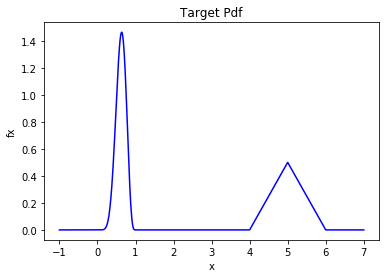

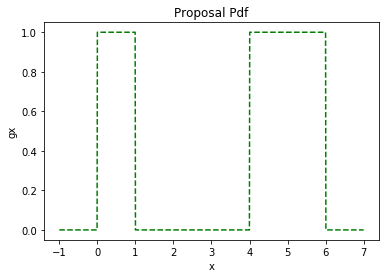

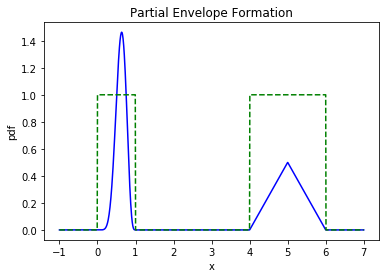

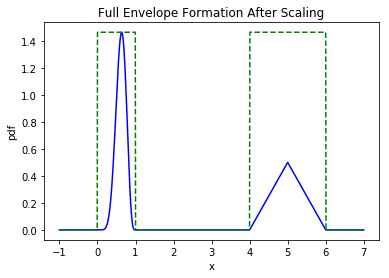

In [521]:
x_graph = np.linspace(-1,7,1000)

fx_graph = target_pdf(x_graph,8,5)
graphplot(x_graph,fx_graph,'x','fx','Target Pdf','b')
plt.show()

gx_graph = proposal_pdf(x_graph)
graphplot(x_graph,gx_graph,'x','gx','Proposal Pdf','g--')
plt.show()

plt.plot(x_graph,fx_graph,'b')
plt.plot(x_graph,gx_graph,'g--')
plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Partial Envelope Formation')
plt.show()

M = scale_factor(fx_graph,gx_graph)
plt.plot(x_graph,fx_graph,'b')
plt.plot(x_graph,M*gx_graph,'g--')  
plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Full Envelope Formation After Scaling')
plt.show()

In [522]:
x = np.linspace(0,6,1000)
fx = target_pdf(x,8,5)
gx = proposal_pdf(x)
M = scale_factor(fx,gx)
u = np.random.uniform(0,1,1000)
print("Scaling Factor :", round(M,3))

Scaling Factor : 1.463


In [523]:
s_count = 0
tot_s = 1000
s_reg = 0
rej_s_count = 0
acc_s_count = 0
rej_list = []
i = 0

while s_count != tot_s:
    if( ( (u[i]*M*gx[i]) > fx[i] ) ): 
        rej_s_count+=1
        s_reg += 1
    else:
        acc_s_count+= 1
        rej_list.append( (rej_s_count)/(rej_s_count+1) )
        rej_s_count = 0
    s_count +=1
    i+=1

rej_rate = ((np.sum(rej_list))/(acc_s_count))*100
rej_rate = round(rej_rate,3)
print("Rejection Rate :",rej_rate,"%")

Rejection Rate : 7.365 %


### Summary:

1. generate target pdf using the above bimodal distribution for 1000 samples.
2. generate proposal pdf using the uniform distribution for 1000 samples, which is defined by
    
   \begin{align}
   \ g(x)
   \begin{cases}
    1      & \quad \text{, } x\:\epsilon\: [0,1]\:U\:[4,5]\:U\:[5,6] \\
    0      & \quad \text{, else }
    \end{cases}
    \end{align}
    
    We generate 3 envelopes for each of the 3 intervals. These partially cover the target pdf fx.
    
3. find the value of the Scaling factor M by the following method : $max$( $fx$ / $gx$ ). 
4. scale gx by multiplying by scaling factor M and cover fx by this fully formed envelope. 
5. generate 1000 uniform random samples U ,  between 0 and 1. 
6. Now check condition for rejection sampling algorithm,

   \begin{align}
   \ U[i]*M*gx[i] <= fx[i]\;,\; Accept\;Sample\\
   \ U[i]*M*gx[i] > fx[i]\;,\; Reject\;Sample
   \end{align}


7. Calculate the rejection rate by the following method:
   for every sequence of rejections followed by an accepted sample, divide the number of rejected samples by the number of rejected samples plus the accepted sample and store it in a list. Repeat this procedure and keep appending the list. After covering 1000 samples, we then take the average of the list or sum up the individual rejection rates and divide by the total accepted samples to get the final rejection rate which is the average number of rejected candidates per sample or the efficiency of the Random Number Generator.
    

### Results:

1. The Scaling Factor M which helps in fully enveloping the distribution (fx)of random variable X is equal to 1.463.
2. The Rejection Rate also known as the efficiency of the RNG comes out to be around :  7.365 %

### Q2: Independence: Internally and Externally

### Independence through Covariance Statistic

Take 1000 samples of the bimodal distribution above. Use the covariance statistic to test
the independence between $X_{k}$ and the lagged version $X_{k+5}$

In [550]:
no_samples = 10000
x = np.random.uniform(0,6,no_samples)
fx = target_pdf(x,8,5)
gx = proposal_pdf(x)
u = np.random.uniform(0,1,no_samples)

final_samples = 1000
rv_xk = np.zeros(shape=(final_samples,))

count = 0
for i in range(no_samples):
    if count == final_samples:
        break
    if (u[i]*M*gx[i]) <= fx[i]:
        rv_xk[count] = fx[i]
        count+=1
        
lag = 5
rv_xklag = np.zeros(len(rv_xk))

for i in range(len(rv_xklag)):
    if i >= (final_samples-(lag)):
        rv_xklag[i] = 0
    else:
        rv_xklag[i] = rv_xk[(i+lag)]

xk_mean = np.mean(rv_xk)
xklag_mean = np.mean(rv_xklag)
x_shift = rv_xk - xk_mean
x_shift_lag = rv_xklag - xklag_mean
cov_stat = np.mean(x_shift*x_shift_lag)

print("Covariance Statistic : ", round(cov_stat,5) )

Covariance Statistic :  0.00027


### Summary:

1. generate 1000 samples from the bimodal pdf $fx$ through the rejection sampling method. Accept all 1000 which fullfill the Double-Rejection algorithm and reject the rest of the samples. These samples belong to random variable $X_{k}$.
2. from $X_{k}$, take samples after intervals of 5 and construct the lagged random variable $X_{k+5}$ and discard samples from 996th sample to 1000th sample as they go out of range in $X_{k+5}$. Restrict Independence Test for the 995 samples only.
3. perform the Covariance Statistic test for inpendence from the formula.
   $ S_{X_{k}X_{k+5}}$ = ${\frac{1}{N}}$ * ( $X_{k}$ - $\mu_{k}$ ) * ( $X_{k+5}$ - $\mu_{k+5}$ ) , for all N = 995 samples.
4. After calculating Covariance Statistic conclude independence if the result is close to zero else state that the random variables are not independent.

### Results:

1. The Covariance Statistic was found to be 0.00027. This is a very small value and is close to zero, Therefore, we conclude that random variables $X_{k}$ and $X_{k+5}$ are infact independent.

### Independence analysis using 2-way Contingency Tables

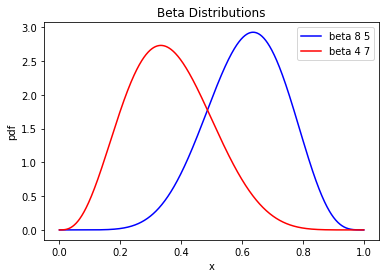

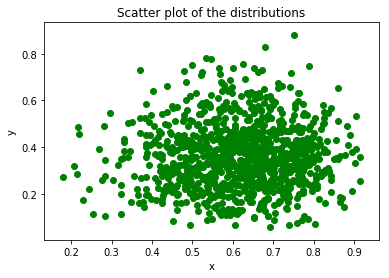

In [525]:
tot_samples = 1000
data = np.linspace(0,1,tot_samples)

x = np.random.beta(8,5,tot_samples)
x_pdf = beta.pdf( data , 8 , 5 )
plt.plot(data,x_pdf,'b',label='beta 8 5')

y = np.random.beta(4,7,tot_samples)
y_pdf = beta.pdf( data , 4 , 7  )
plt.plot(data,y_pdf,'r',label='beta 4 7')

plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Beta Distributions')
plt.legend()
plt.show()

plt.scatter(x,y,color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of the distributions')
plt.show()

In [526]:
"""
Bins the 2-D plot and provides information of the number of points in each bin.
@param x: Distribution samples
       y: Distribution samples
       bin_axis: Number of bins per axis ( x or y)
@return b: 2-D array containing number of points in each bin.
"""

def observed_bin(x,y,bin_axis):
    tot_bins = bin_axis*bin_axis
    ival_x = (float)(1.0/bin_axis)
    ival_y = (float)(1.0/bin_axis)
    points = list(zip(x,y))
    b = np.zeros(shape=(bin_axis,bin_axis))
    for i in range(bin_axis):
        for j in range(bin_axis):
            for point in points:
                if ( ( ( point[0] >= (ival_x*j) ) and ( point[0] <= (ival_x*(j+1)) ) ) and 
                         ( ( point[1] >= (ival_y*i) ) and ( point[1] <= (ival_y*(i+1)) ) ) ):
                    b[i][j]+=1
    
    plt.scatter(x,y,color='green')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Binning process for the scatterplot with a total of '+str(bin_axis**2)+' bins')
    for i in range(bin_axis-1):
        plt.axvline( x=(ival_x*(i+1)) )
        plt.axhline( y=(ival_y*(i+1)) )
    plt.show()
    return b

In [527]:
"""
Obtains number of expected sample for each bin from the observed bin.
@param b: 2-D array containing number of points in each bin.
       bin_axis: number of bins per axis ( x or y)
@return exp: Expected number of points in each bin according to a formula.
"""

def expected_bin(b,bin_axis):
    pi = np.sum(b,axis=1)/tot_samples
    pj = np.sum(b,axis=0)/tot_samples
    exp = np.zeros(shape=(bin_axis,bin_axis))
    for i in range(bin_axis):
        for j in range(bin_axis):
            exp[i][j] = tot_samples*pi[i]*pj[j]
    return exp

In [528]:
"""
Function for calculating Chi-Square Statistic
@param  bin_axis: number of bins per axis ( x or y)
        b: 2-D array containing number of points in each bin.
        exp: Expected number of points in each bin according to a formula.
@return chi_sqval: Chi-Square Statistic value
"""

def chi_stat(bin_axis,b,exp):
    num = np.zeros(shape=(bin_axis,bin_axis))
    result = np.zeros(shape=(bin_axis,bin_axis))
    for i in range(bin_axis):
        for j in range(bin_axis):
            num[i][j] = (b[i][j]-exp[i][j])**2
            result[i][j] = num[i][j]/exp[i][j]
    chi_sqval = np.sum(result)
    return chi_sqval

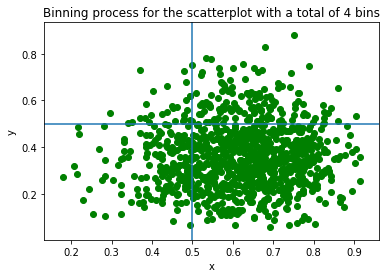

Results of Contingency Table Test for Independence: 

For total bins 4 :
Calculated Chi-Square Statistic:  0.50454
Critical Chi-Square Value:  3.84146
P value:  0.47751
We Cannot Reject The Null Hypothesis and Hence, Say that X and Y are Independent


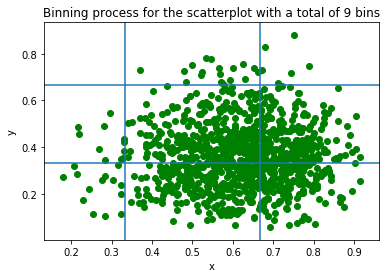

Results of Contingency Table Test for Independence: 

For total bins 9 :
Calculated Chi-Square Statistic:  5.07228
Critical Chi-Square Value:  9.48773
P value:  0.27996
We Cannot Reject The Null Hypothesis and Hence, Say that X and Y are Independent


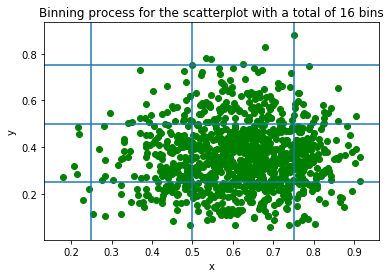

Results of Contingency Table Test for Independence: 

For total bins 16 :
Calculated Chi-Square Statistic:  5.16398
Critical Chi-Square Value:  16.91898
P value:  0.81979
We Cannot Reject The Null Hypothesis and Hence, Say that X and Y are Independent


In [529]:
bin_axis = [2,3,4]
df = [1,4,9]
alpha = 0.05 # Significance-Level
for i in range(len(bin_axis)):
    b = observed_bin(x,y,bin_axis[i])
    exp = expected_bin(b,bin_axis[i])
    chi_sqval = chi_stat(bin_axis[i],b,exp)
    print("Results of Contingency Table Test for Independence: \n")
    print("For total bins",bin_axis[i]**2,":")
    print('Calculated Chi-Square Statistic: ',round(chi_sqval,5))
    crit_val = stats.chi2.ppf(q = 0.95, df = df[i])
    print('Critical Chi-Square Value: ', round(crit_val,5) )
    p_value = 1 - stats.chi2.cdf(x=chi_sqval, df=df[i])
    print('P value: ',round(p_value,5))
    if(p_value>0.05):
        print("We Cannot Reject The Null Hypothesis and Hence, Say that X and Y are Independent")
    else:
        print("We Reject The Null Hypotheses and Accept the Alternate Hypothesis which states that there is a relationship between X and Y")

### Summary:

1. We first generate 1000 samples from beta distributions X [beta(8,5)] and Y [beta(4,7)].
2. Plot the Scatter Plot between X and Y samples.
3. Perform Binning with bin per axis = 2,3 and 4. Resulting in 4,9 and 16 bins respectively.
   With this we get the Observed Binning Oij = number of samples in Bij, where Bij is the number of samples in each bin after performing binning of Scatter Plot.
4. Calculate Expected Bin Values $Eij$ = $N.Pi.Pj$, where N = Total Samples, $Pi= Ni/N , Pj = Nj/N$
5. We then Calculate the Chi-Square Value through the following Formula:

   $\sum_{i=1,j=1}^{i=r,j=c}$ ($O_{ij}$ - $E_{ij}$ )$^2$/$E_{ij}$
   
6. We then Get the Degrees of Freedom for the respective bins which are calculated as dof = (r-1)(c-1) where r and c represent rows and columns respectively. For bins per axis = 2,3,4 and 5. We get degrees of freedom = 1,4,9 and 16 respectively.

7. We look up the Critical Chi-square distribution value and see the significance level of 0.05 column to calculate the Critical Chi-square value for that particular degrees of freedom. This give us $\chi^2_{crit}$ for the respective degrees of freedom having significance level alpha = 0.05.

8. We then find the p-value by the formula, P($\chi^2$ > $\chi^2_{calc}$)

9. To Interpret these results we state the hypothesis:

   -  Hypothesis:

   $H_{0}$ = X and Y are independent.   ----> Null Hypothesis
   
   $H_{a}$ = X and Y are not independent.  ----> Alternate Hypothesis
   
   -  Using $\chi^2_{crit}$ Test,
   
   Now if $\chi^2_{calc}$ < $\chi^2_{crit}$, we fail to reject Null Hypothesis and hence, say that X and Y are independent.
   
   if $\chi^2_{calc}$ > $\chi^2_{crit}$, we reject Null Hypothesis and accept the Alternate Hypothesis and hence, X and Y are not independent and thus, have some relationship.
   
   -  Using P-value Test,
   
   if P-value < Significance level alpha=0.05, we reject Null Hypothesis and accept the Alternate Hypothesis and hence, X and Y are not independent and thus, have some relationship.
   
   if P-value > Significance level alpha=0.05, we fail to reject Null Hypothesis and hence, say that X and Y are independent.

### Results:

We see the following results:

Results of Contingency Table Test for Independence: 

- For total bins 4 :
Calculated Chi-Square Statistic:  0.50454
Critical Chi-Square Value:  3.84146
P value:  0.47751
We Cannot Reject The Null Hypothesis and Hence, Say that X and Y are Independent


- For total bins 9 :
Calculated Chi-Square Statistic:  5.07228
Critical Chi-Square Value:  9.48773
P value:  0.27996
We Cannot Reject The Null Hypothesis and Hence, Say that X and Y are Independent


- For total bins 16 :
Calculated Chi-Square Statistic:  5.16398
Critical Chi-Square Value:  16.91898
P value:  0.81979
We Cannot Reject The Null Hypothesis and Hence, Say that X and Y are Independent


Hence, we conclude that X and Y are independent using the contingency table test.

## Q3: Network Fit

Given n people in a social network. Suppose any given unordered pair of two people are
connected at random and independently with probability p


• Generate and plot three network samples for each value of p=0.03 and p=0.12. Briefly
discuss the structure of these sample graphs.

• Generate a network with (n, p) = (100, 0.06). The number of connections for network
node i is called the degree $d_i$ of the node. Count the degree of each node in the network
and plot the histogram of degrees. Use goodness-of-fit tests to check how well the
network degree distribution fits a binomial(n=100, p=0.06) or a Poisson(λ=np=6).

In [530]:
"""
Function for calculating Chi-Square Statistic
@param  bin_axis: number of bins per axis ( x or y)
        b: 2-D array containing number of points in each bin.
        exp: Expected number of points in each bin according to a formula.
@return chi_sqval: Chi-Square Statistic value
"""

def fill_matrix(n,p,adj_matrix):
    u = np.random.uniform(0,1,n*n)
    k=0
    for i in range(n):
        for j in range(n):
            if u[k] <= p:
                adj_matrix[i][j] = 1
            else:
                adj_matrix[i][j] = 0
            k+=1
    return adj_matrix

In [531]:
"""
Function for interpreting whether there is an edge or not between the nodes.
@param  n: Number of nodes in the network
        x: Adjacency matrix
@return edge_info: List containing nodes that are connected to each other.
"""

def interpret_matrix_edges(n,x):
    edge_info = []
    for i in range(n):
        for j in range(n):
            if x[i][j] == 1:
                edge_info.append((i+1,j+1))
    return edge_info      

In [532]:
"""
Constructs The Network and stores its information details.
@param  n_nodes: Number of nodes in the network
        prob: probability of connection between nodes
@return ne: Number of edges
        deg_zip: Info of Node i and Degree of Node i. (Node i, Degree i)
        deg_node: all Degrees of each node in list form.
"""

def construct_network(n_nodes,prob):
    
    #define adjacency matrix for graphing
    adj_matrix = []
    for i in range(n_nodes):
        adj_matrix.append([0 for i in range(n_nodes)])
    adj_mat = fill_matrix(n_nodes,prob,adj_matrix)
    edges = interpret_matrix_edges(n_nodes,adj_mat)
    
    #Draw network using graph methodology
    g = nx.Graph()
    node_info = np.arange(1,n_nodes+1,1).tolist()
    g.add_nodes_from(node_info)
    g.add_edges_from(edges)
    
    #Arrangement of network
    plt.figure(figsize = (10,8),dpi=300)
    pos = nx.spring_layout(g)
    nx.draw_networkx_nodes(g,node_size=150,pos=pos)
    nx.draw_networkx_edges(g,pos=pos,width = 0.8)
    nx.draw_networkx_labels(g,pos=pos,font_size=8)
    plt.title("Social Network --> ( P : "+str(prob)+" , N : "+str(n_nodes)+" )")
    plt.xticks([])
    plt.yticks([])
    plt.show()  
    
    #Properties of graph
    
    #Number of edges
    ne = g.number_of_edges()
    
    #Degree of each node in zip form
    deg_zip = g.degree(node_info)
    
    #Degree of each node in list form
    deg_node =[]
    for i in range(1,n_nodes+1):
        deg_node.append(g.degree(i))
    
    return ne,deg_zip,deg_node

C:\Users\ishan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


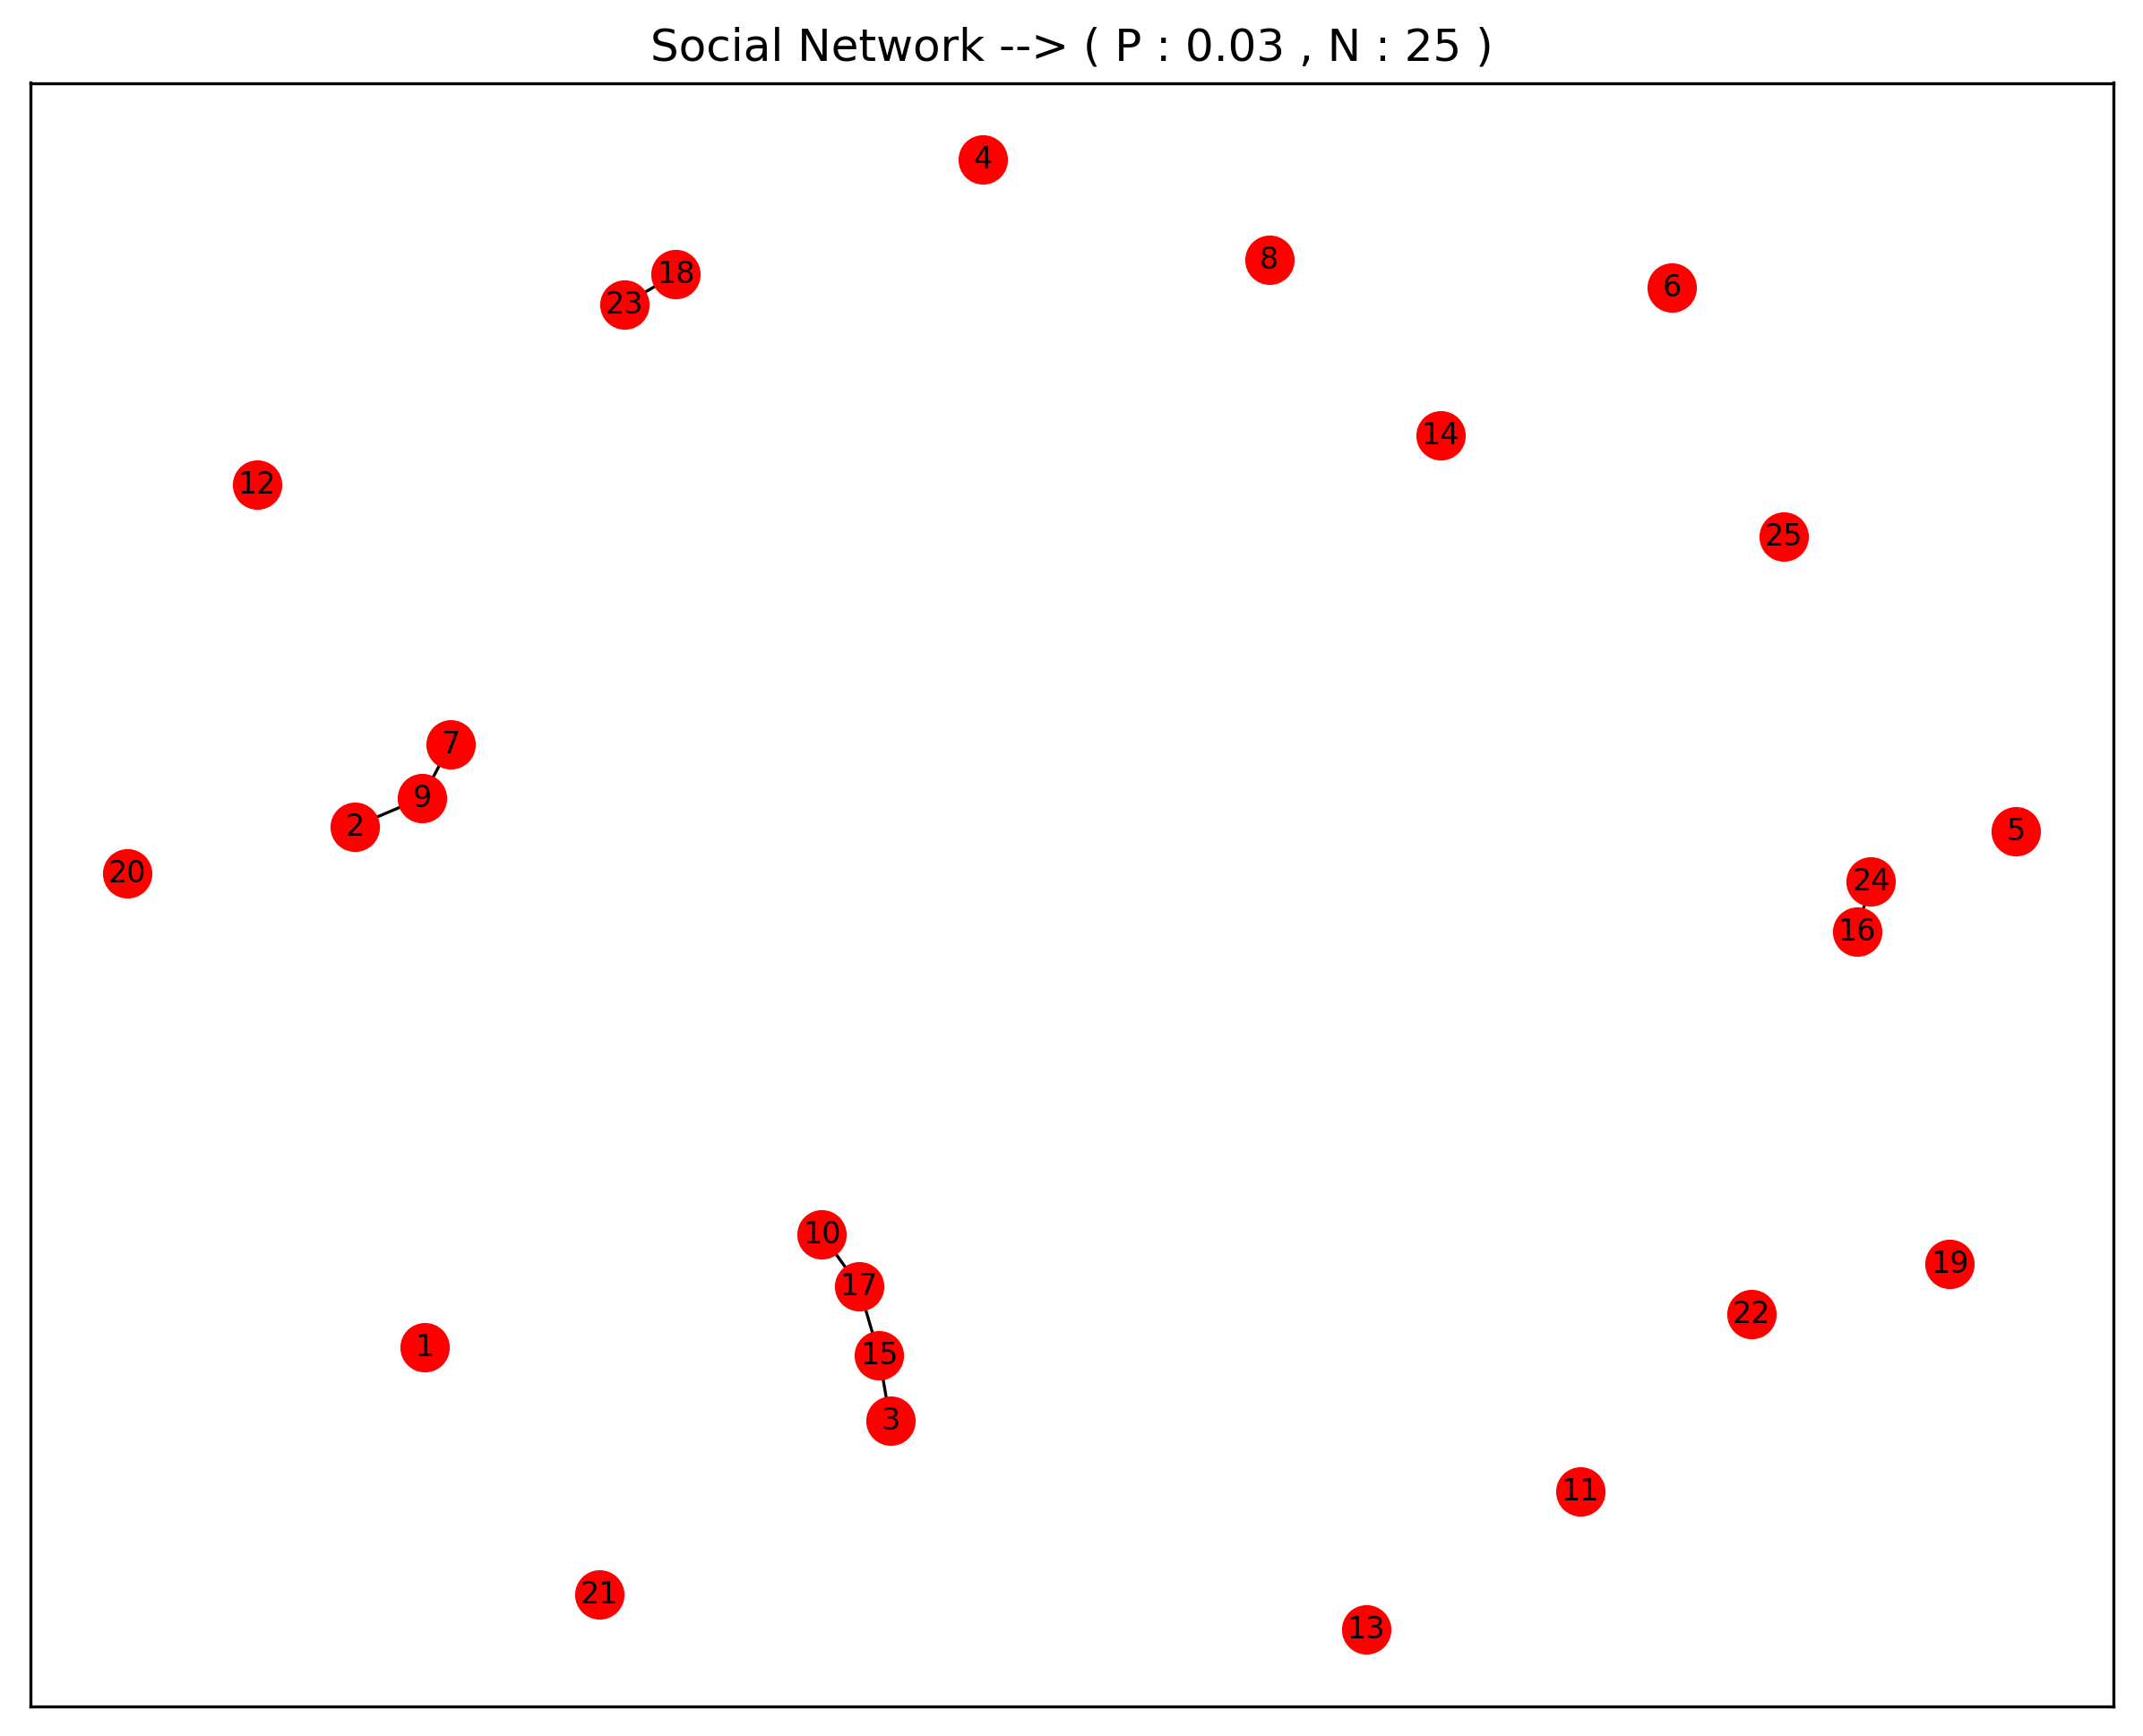

Number of Edges: 9


C:\Users\ishan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


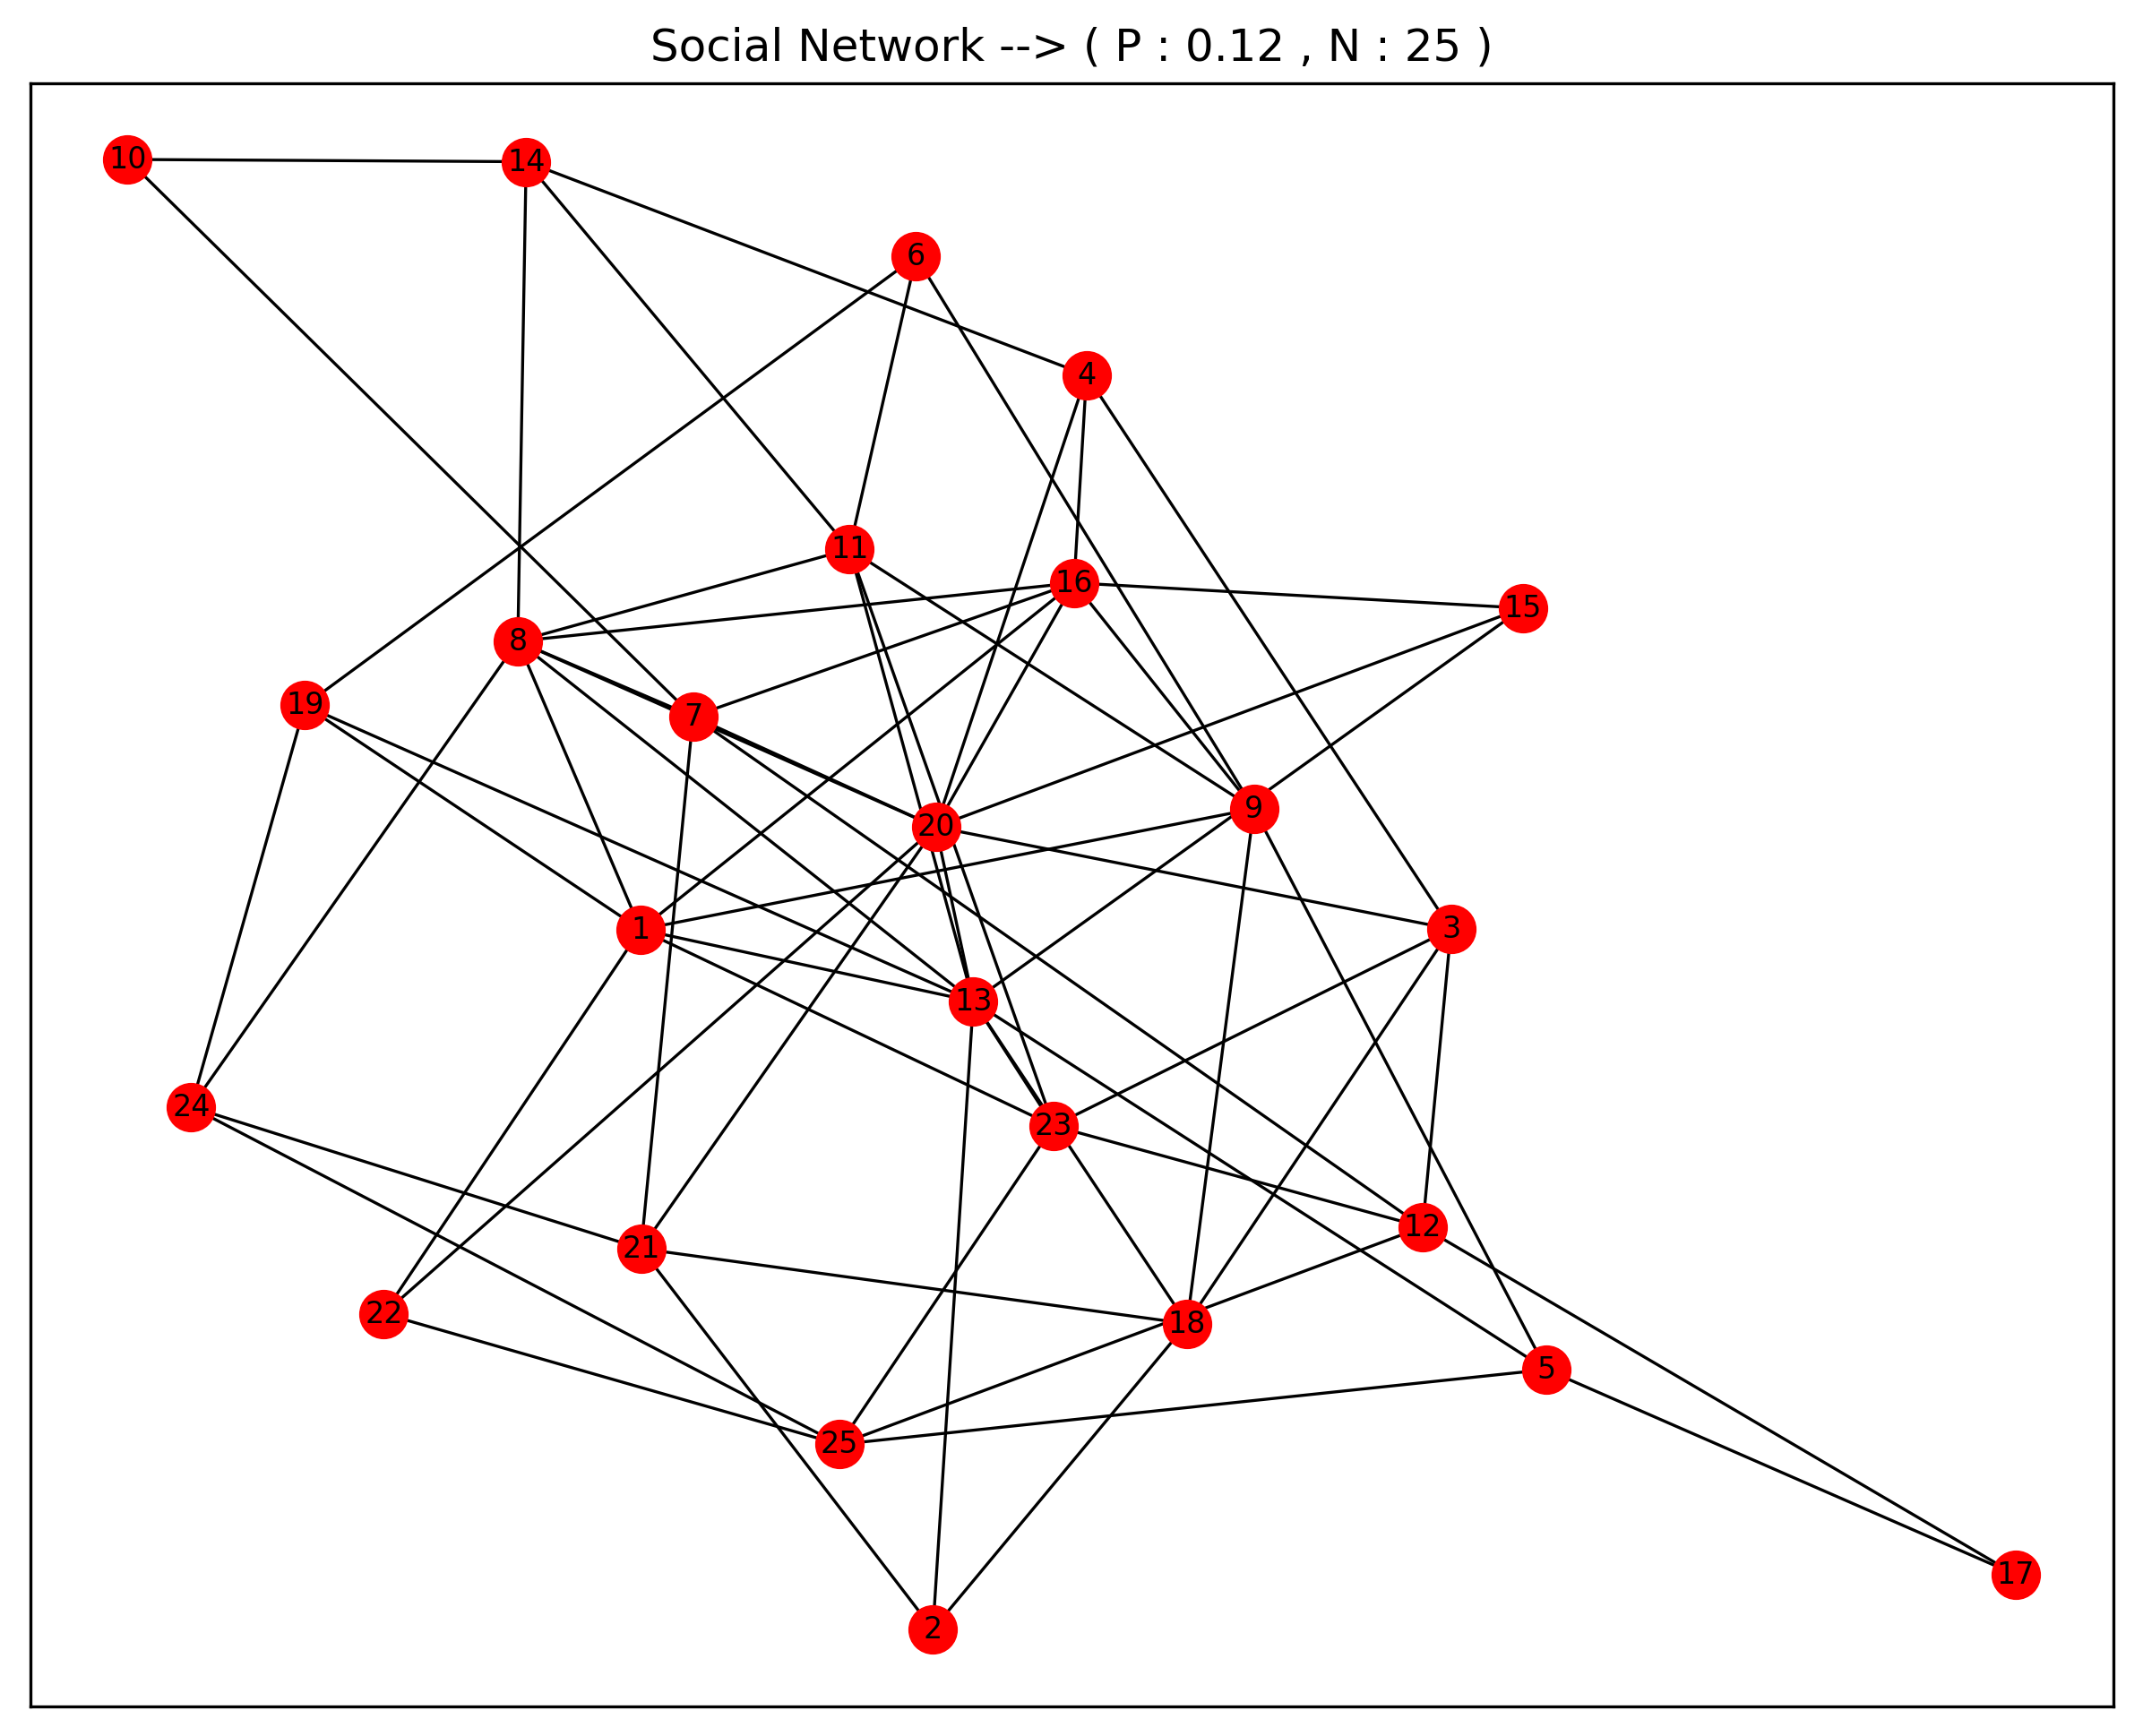

Number of Edges: 65


In [533]:
num_edges , degree_zip , degree_node = construct_network(25,0.03)
print("Number of Edges:",num_edges)
num_edges , degree_zip , degree_node = construct_network(25,0.12)
print("Number of Edges:",num_edges)

C:\Users\ishan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


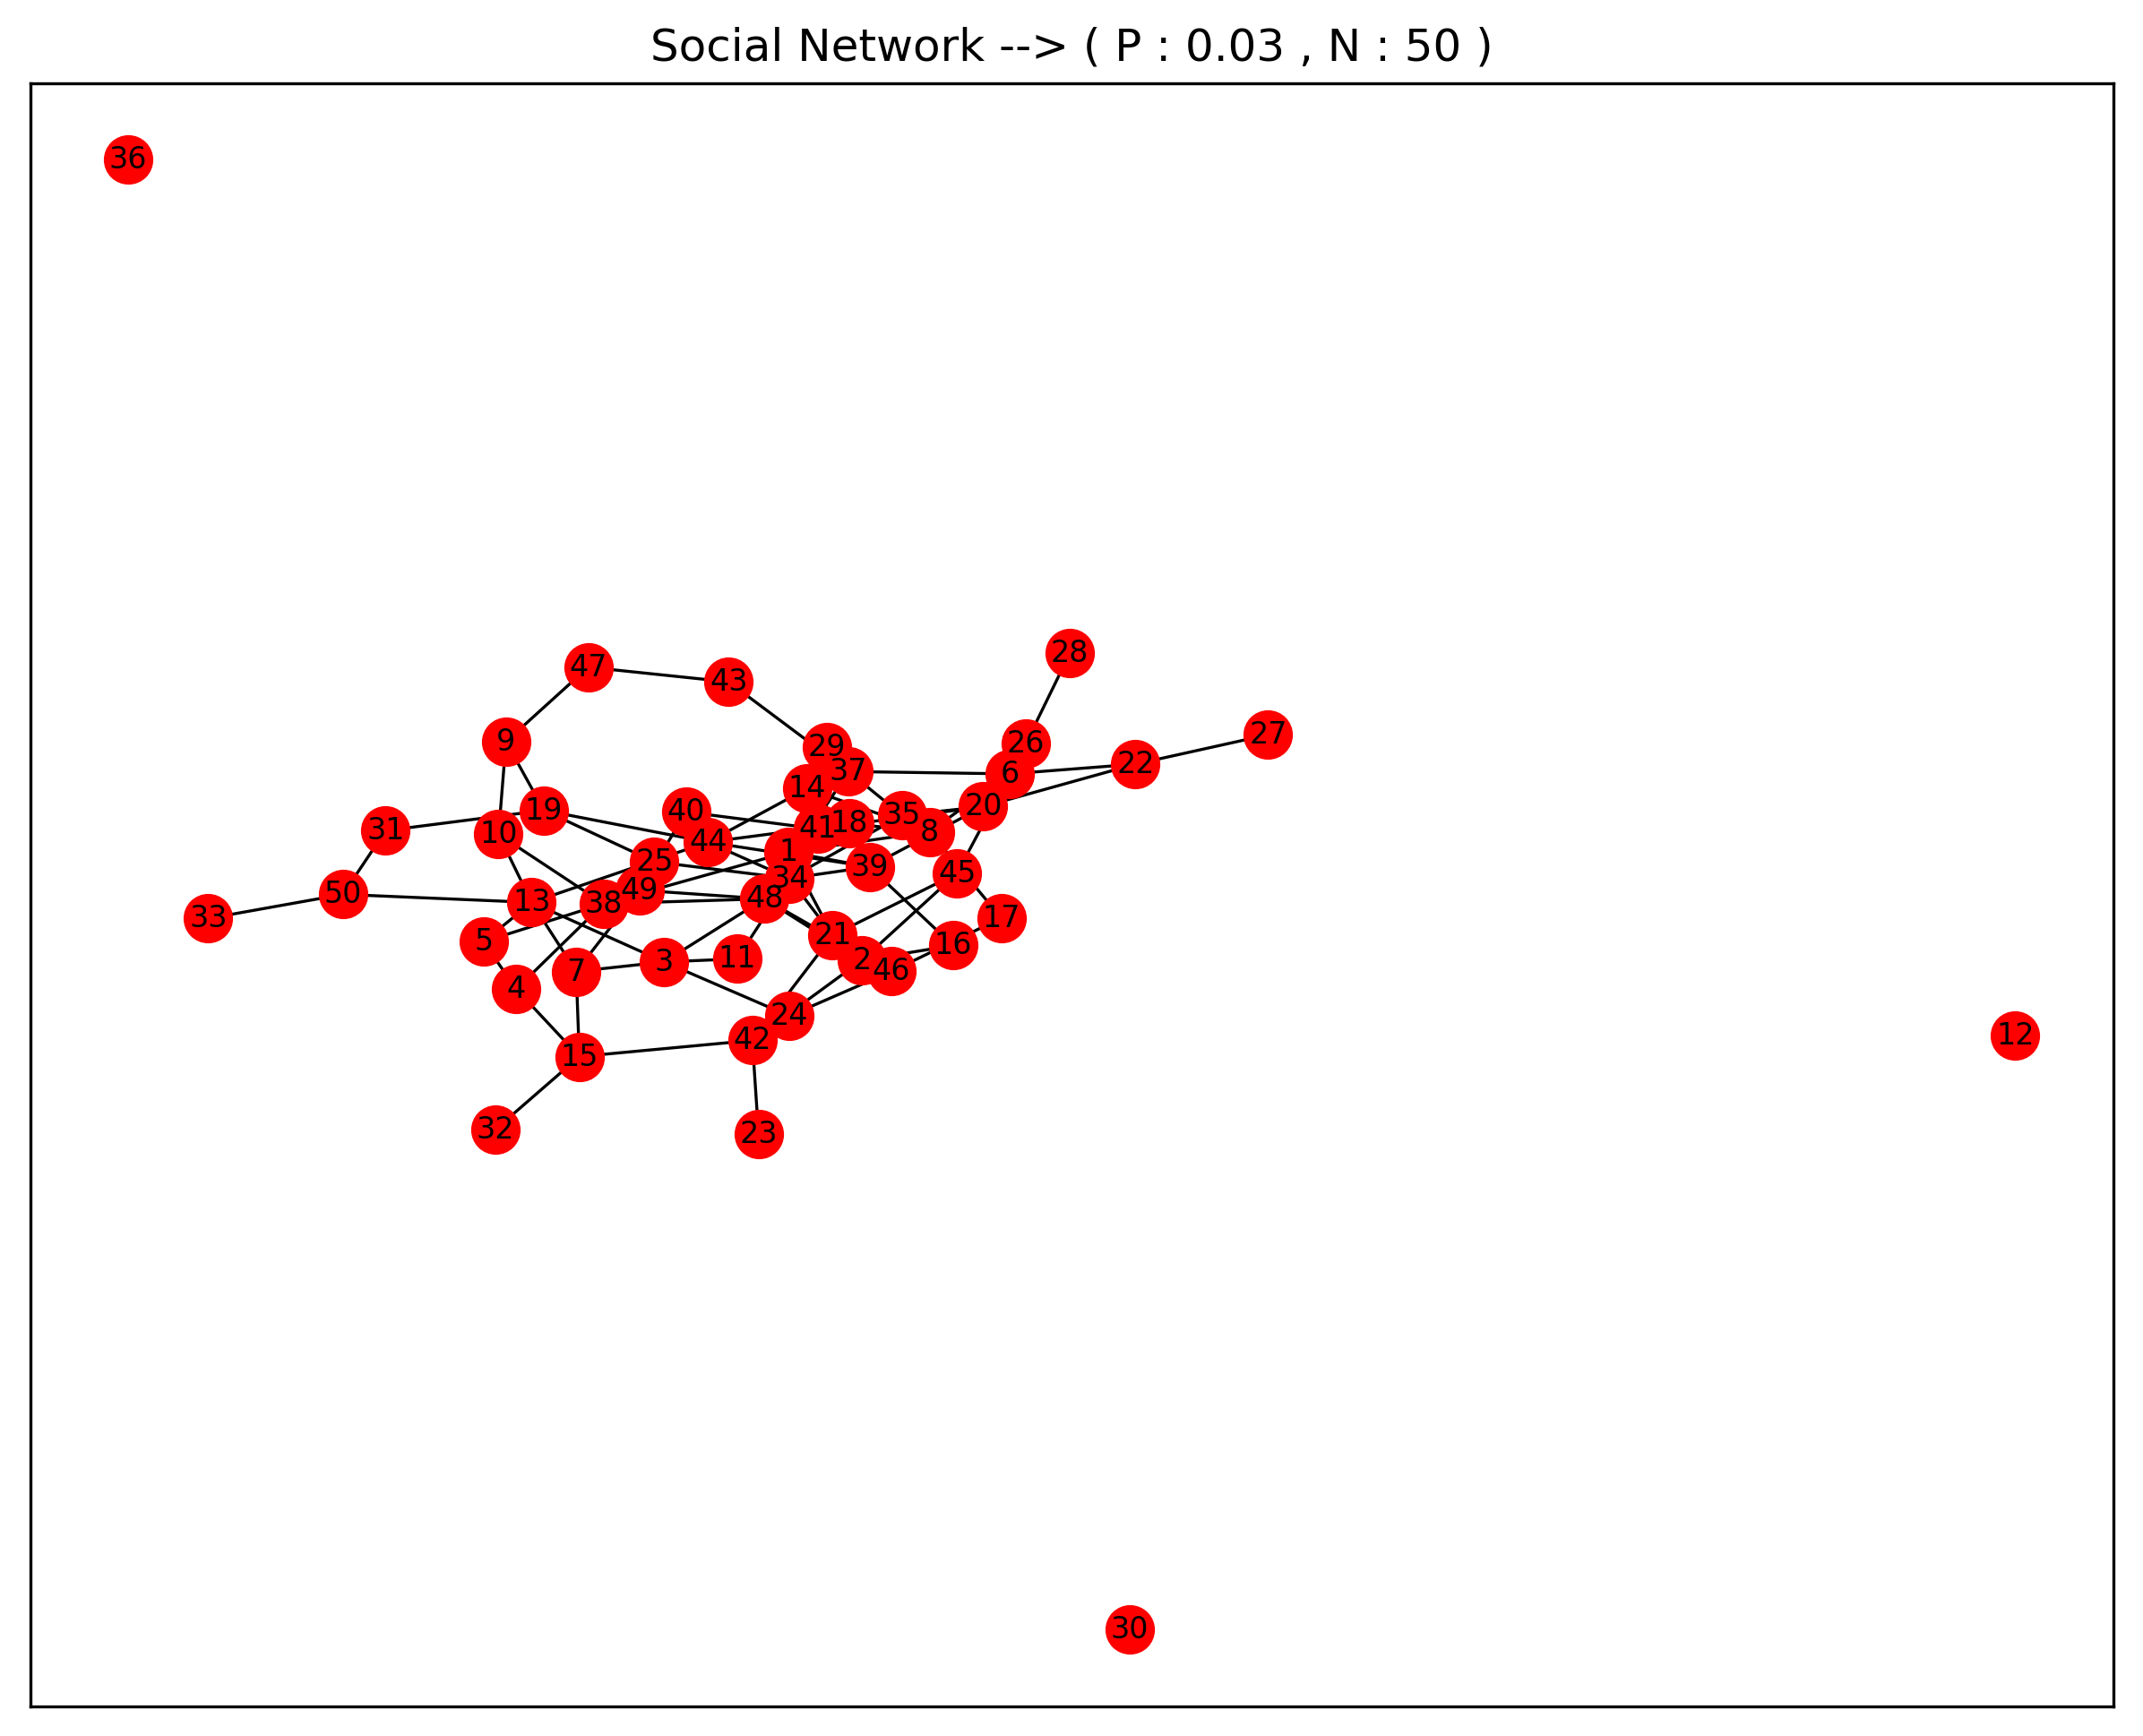

Number of Edges: 79


C:\Users\ishan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


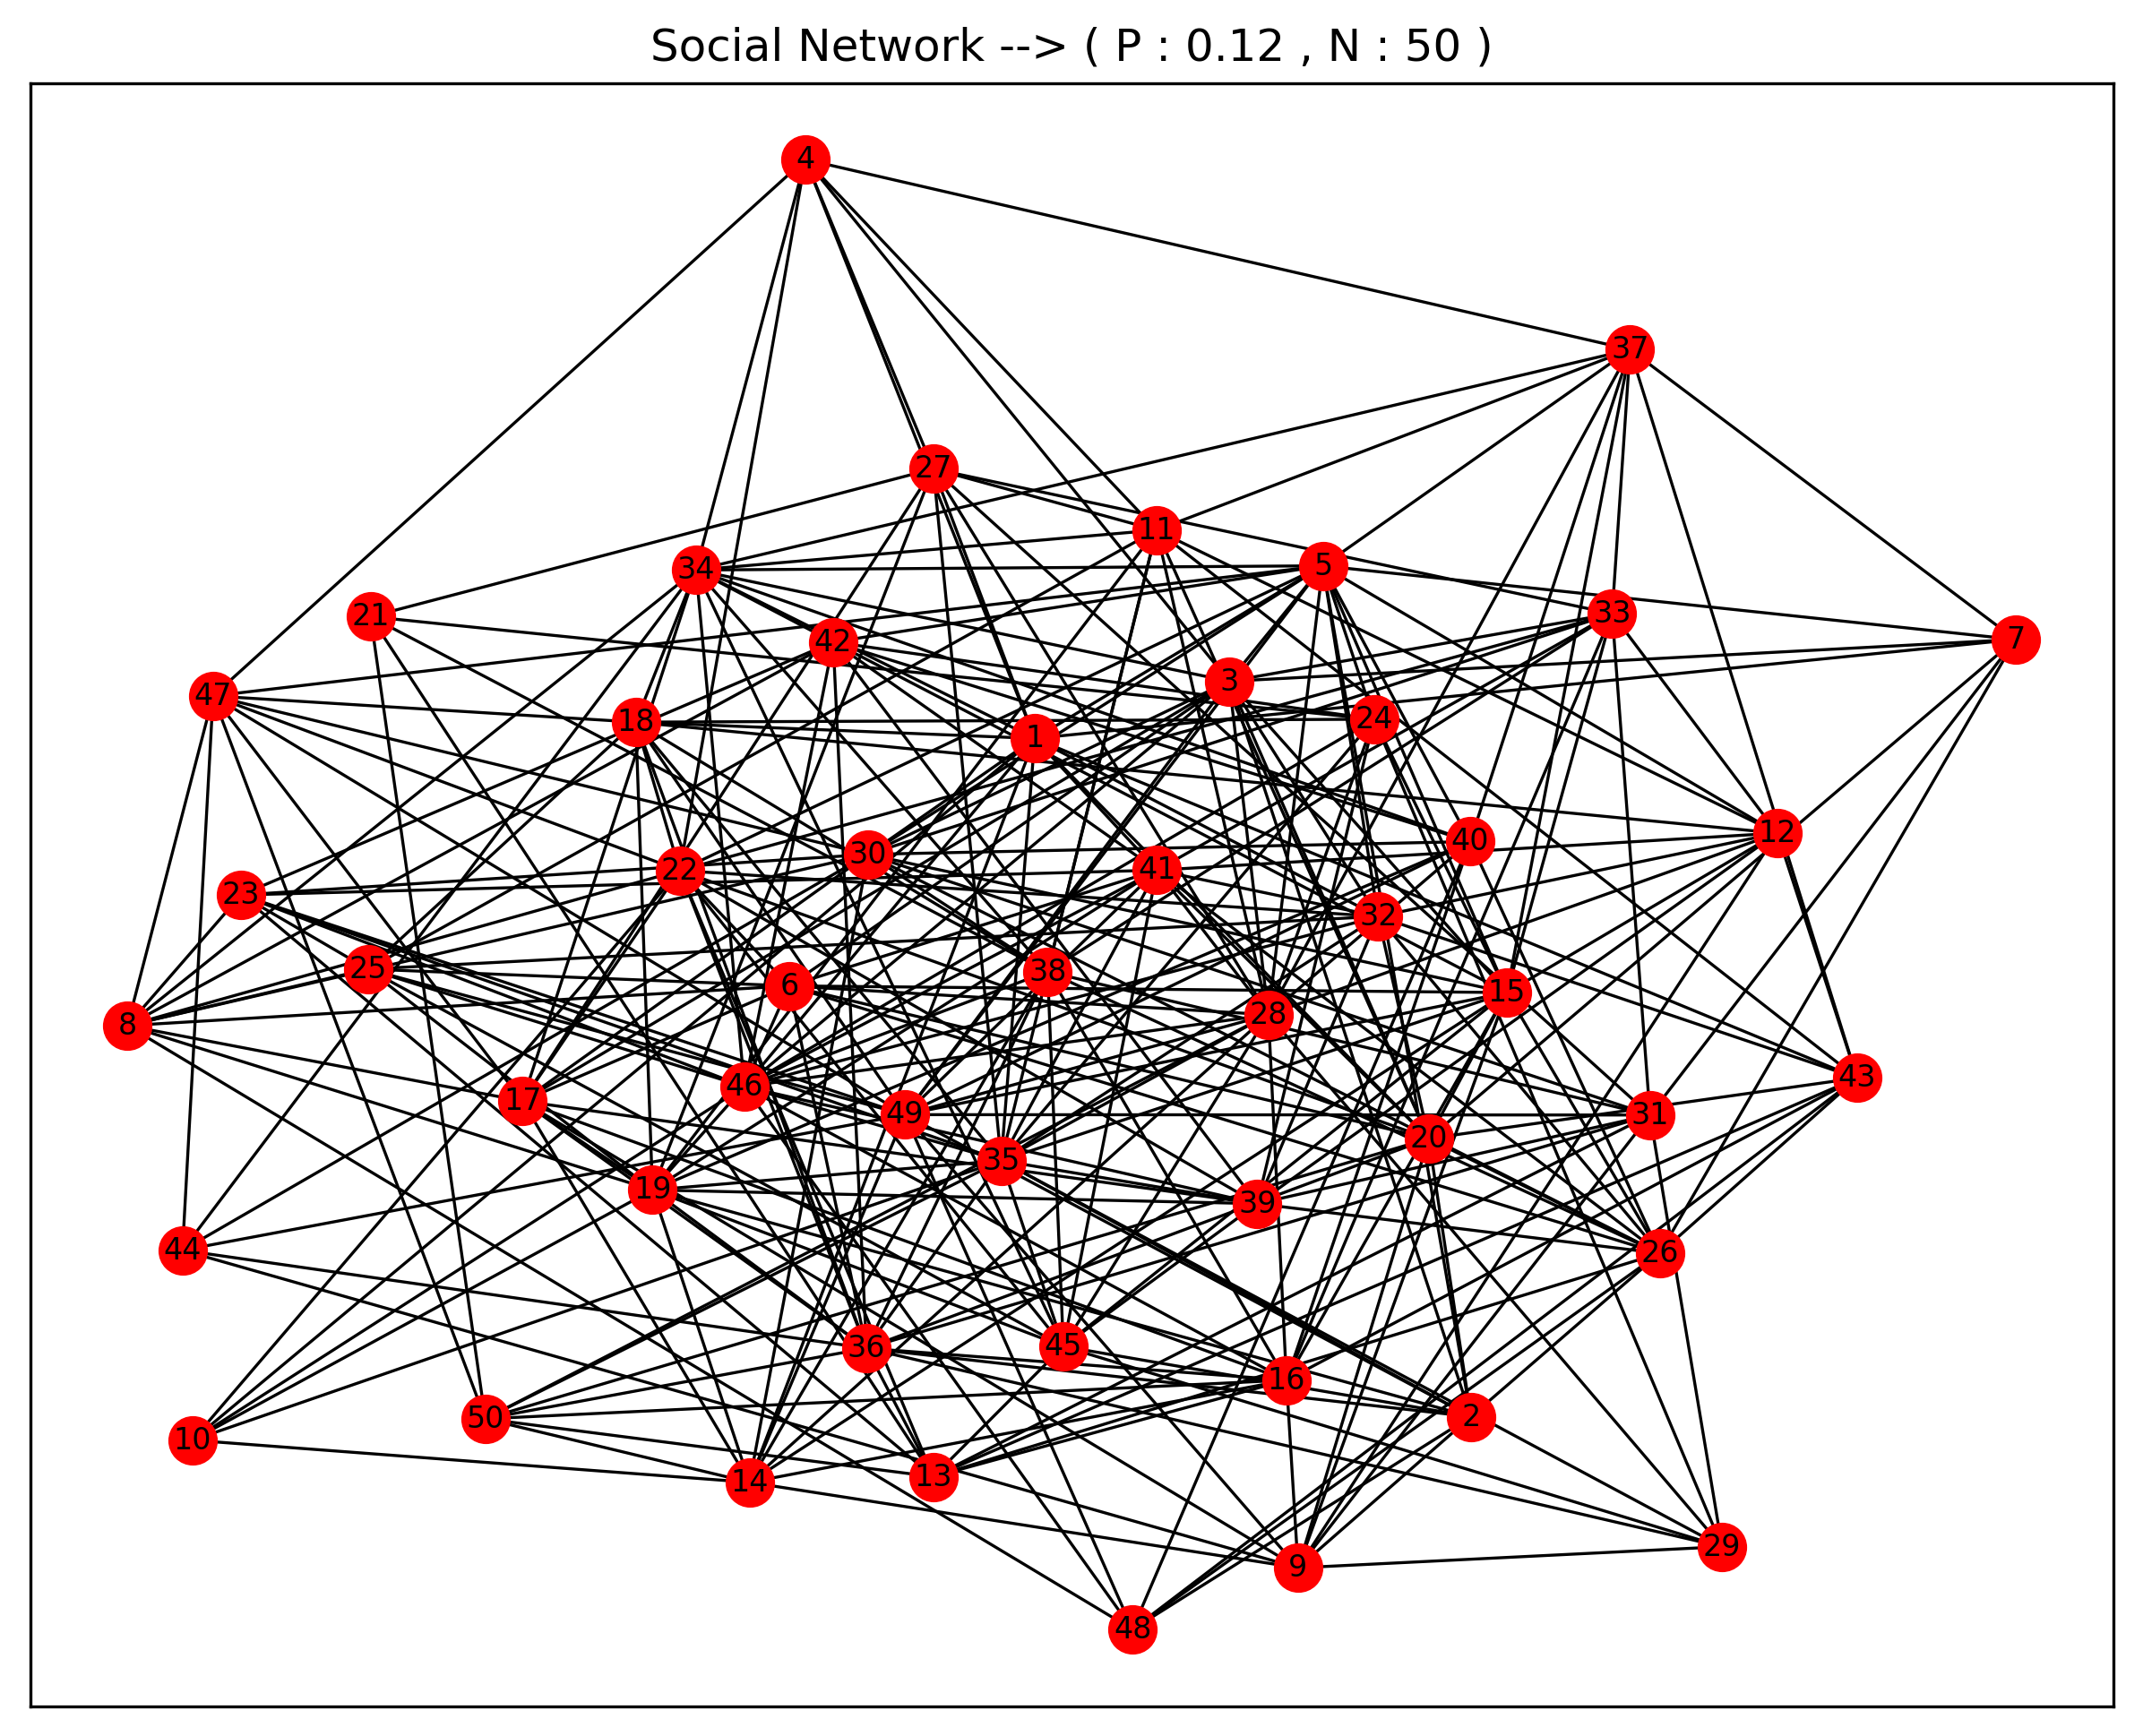

Number of Edges: 312


In [534]:
num_edges , degree_zip , degree_node = construct_network(50,0.03)
print("Number of Edges:",num_edges)
num_edges , degree_zip , degree_node = construct_network(50,0.12)
print("Number of Edges:",num_edges)

C:\Users\ishan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


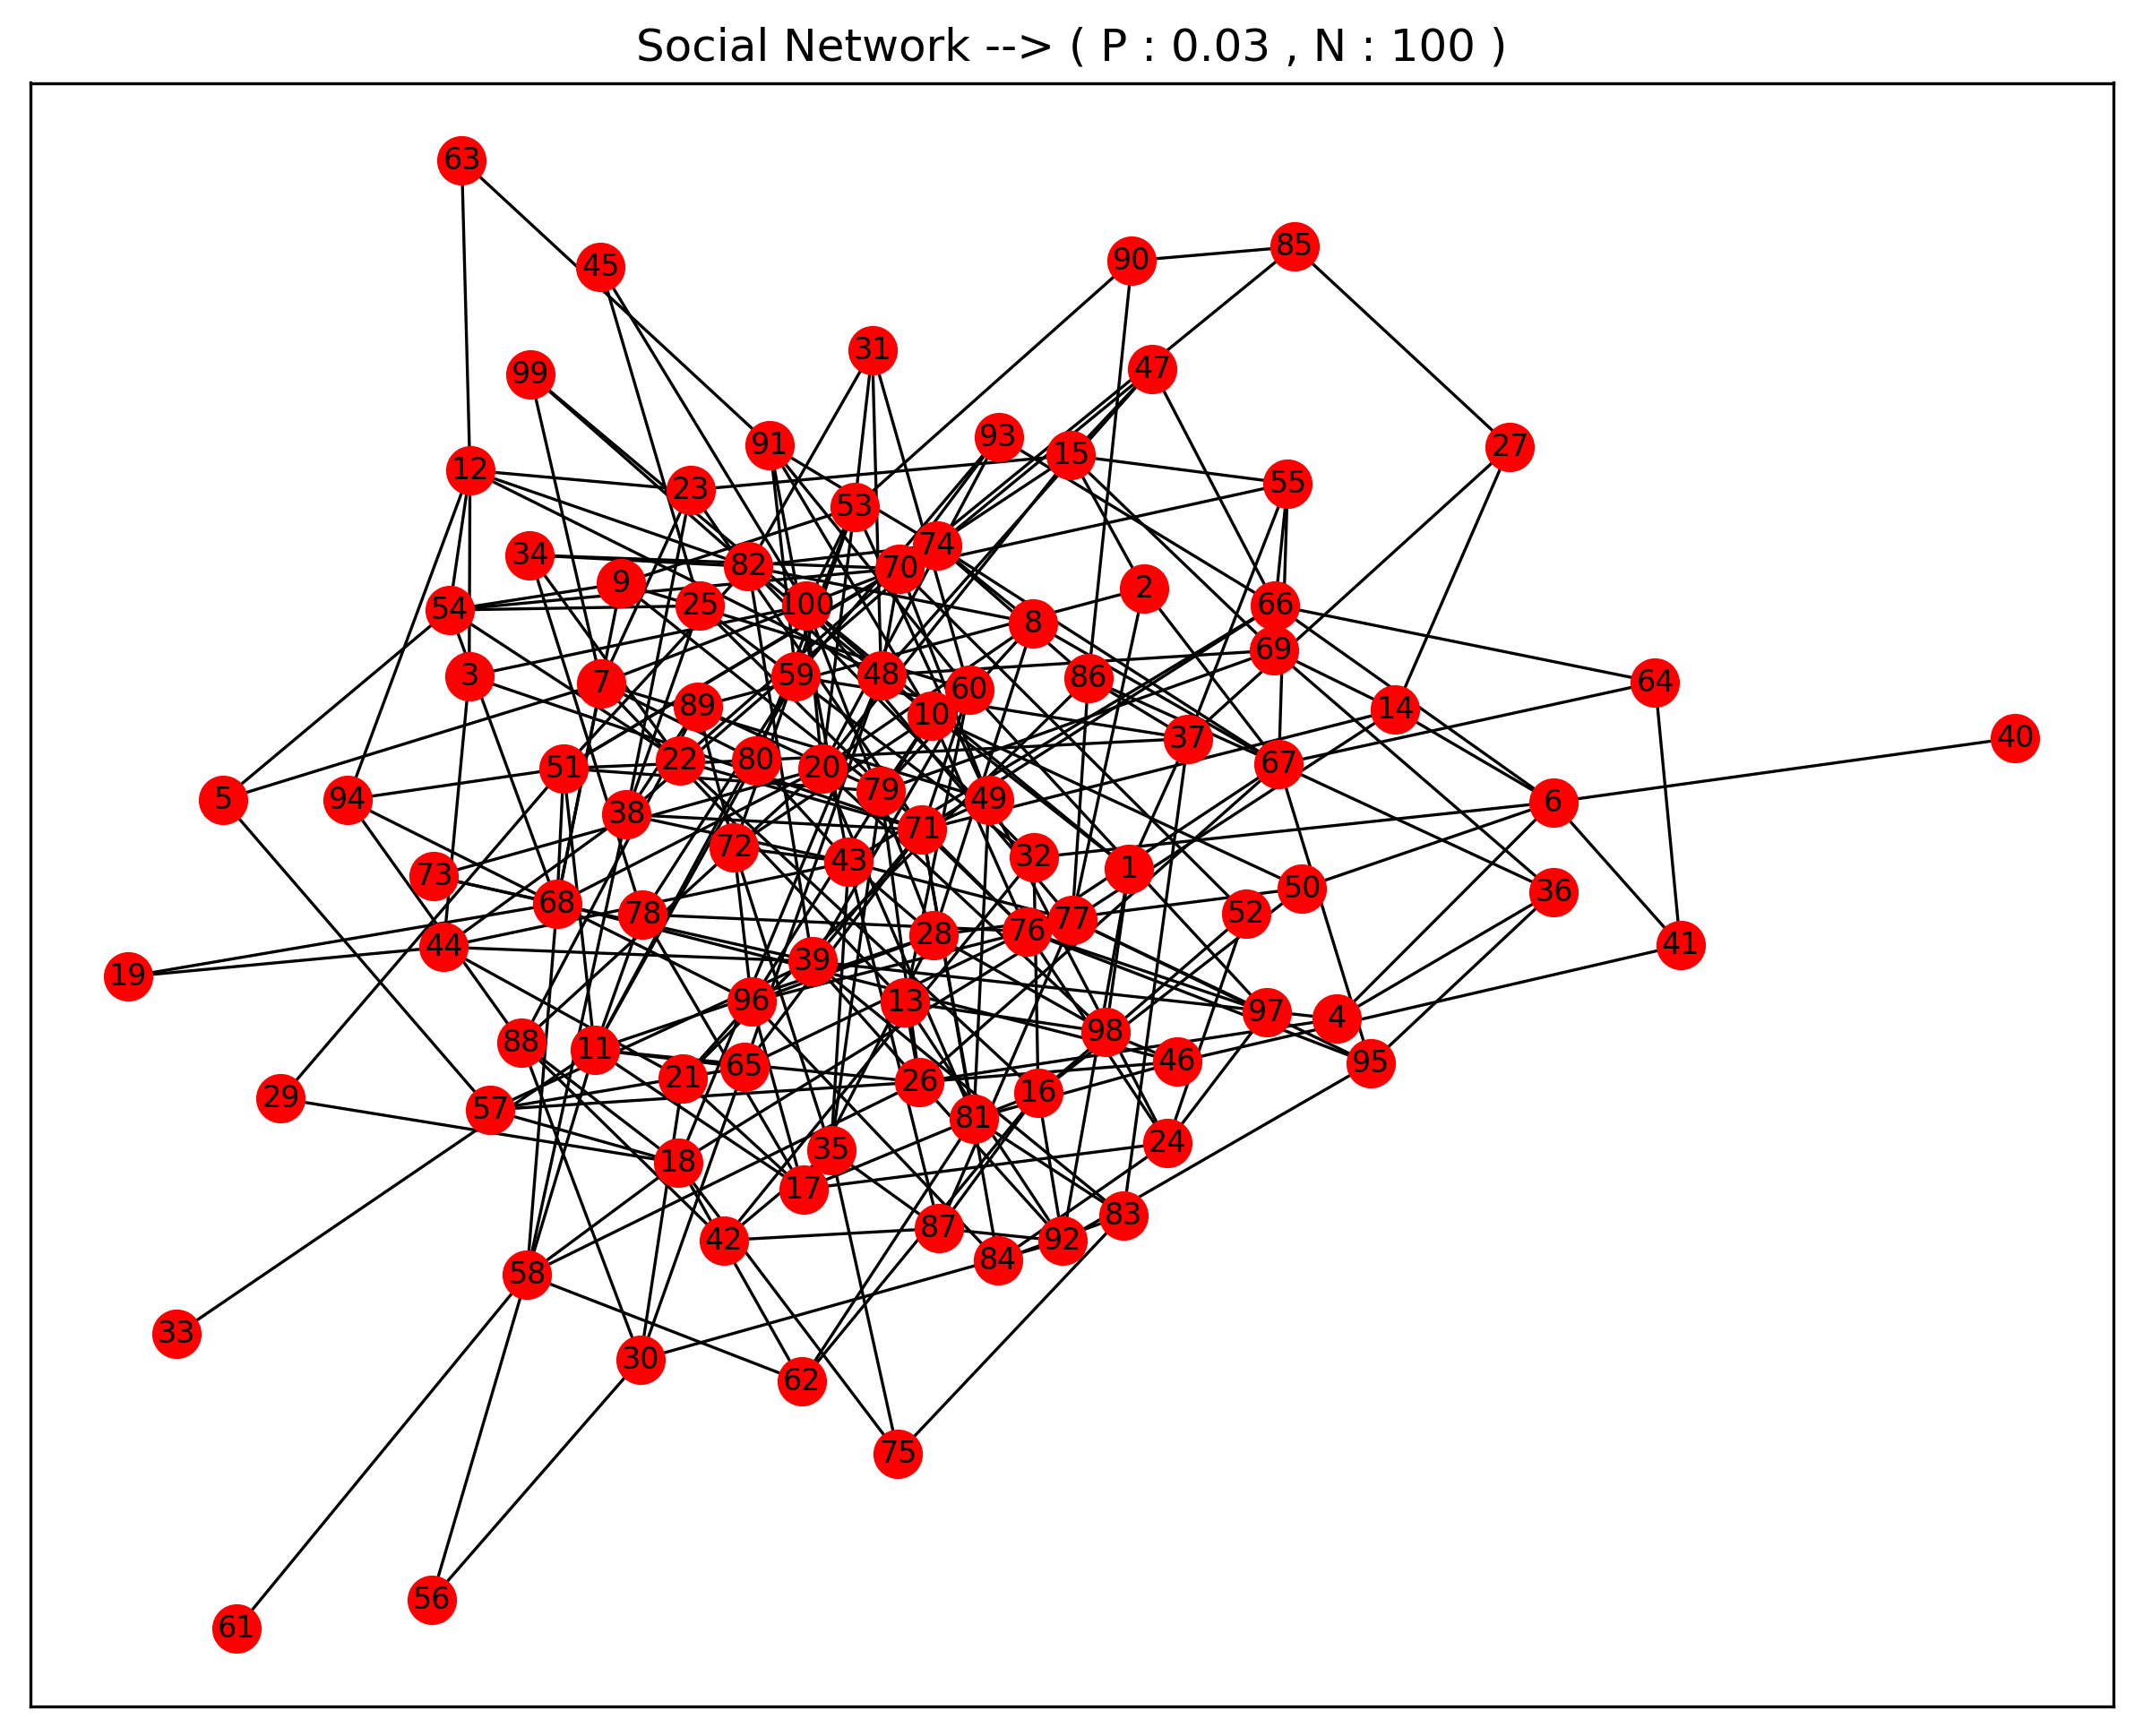

Number of Edges: 292


C:\Users\ishan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


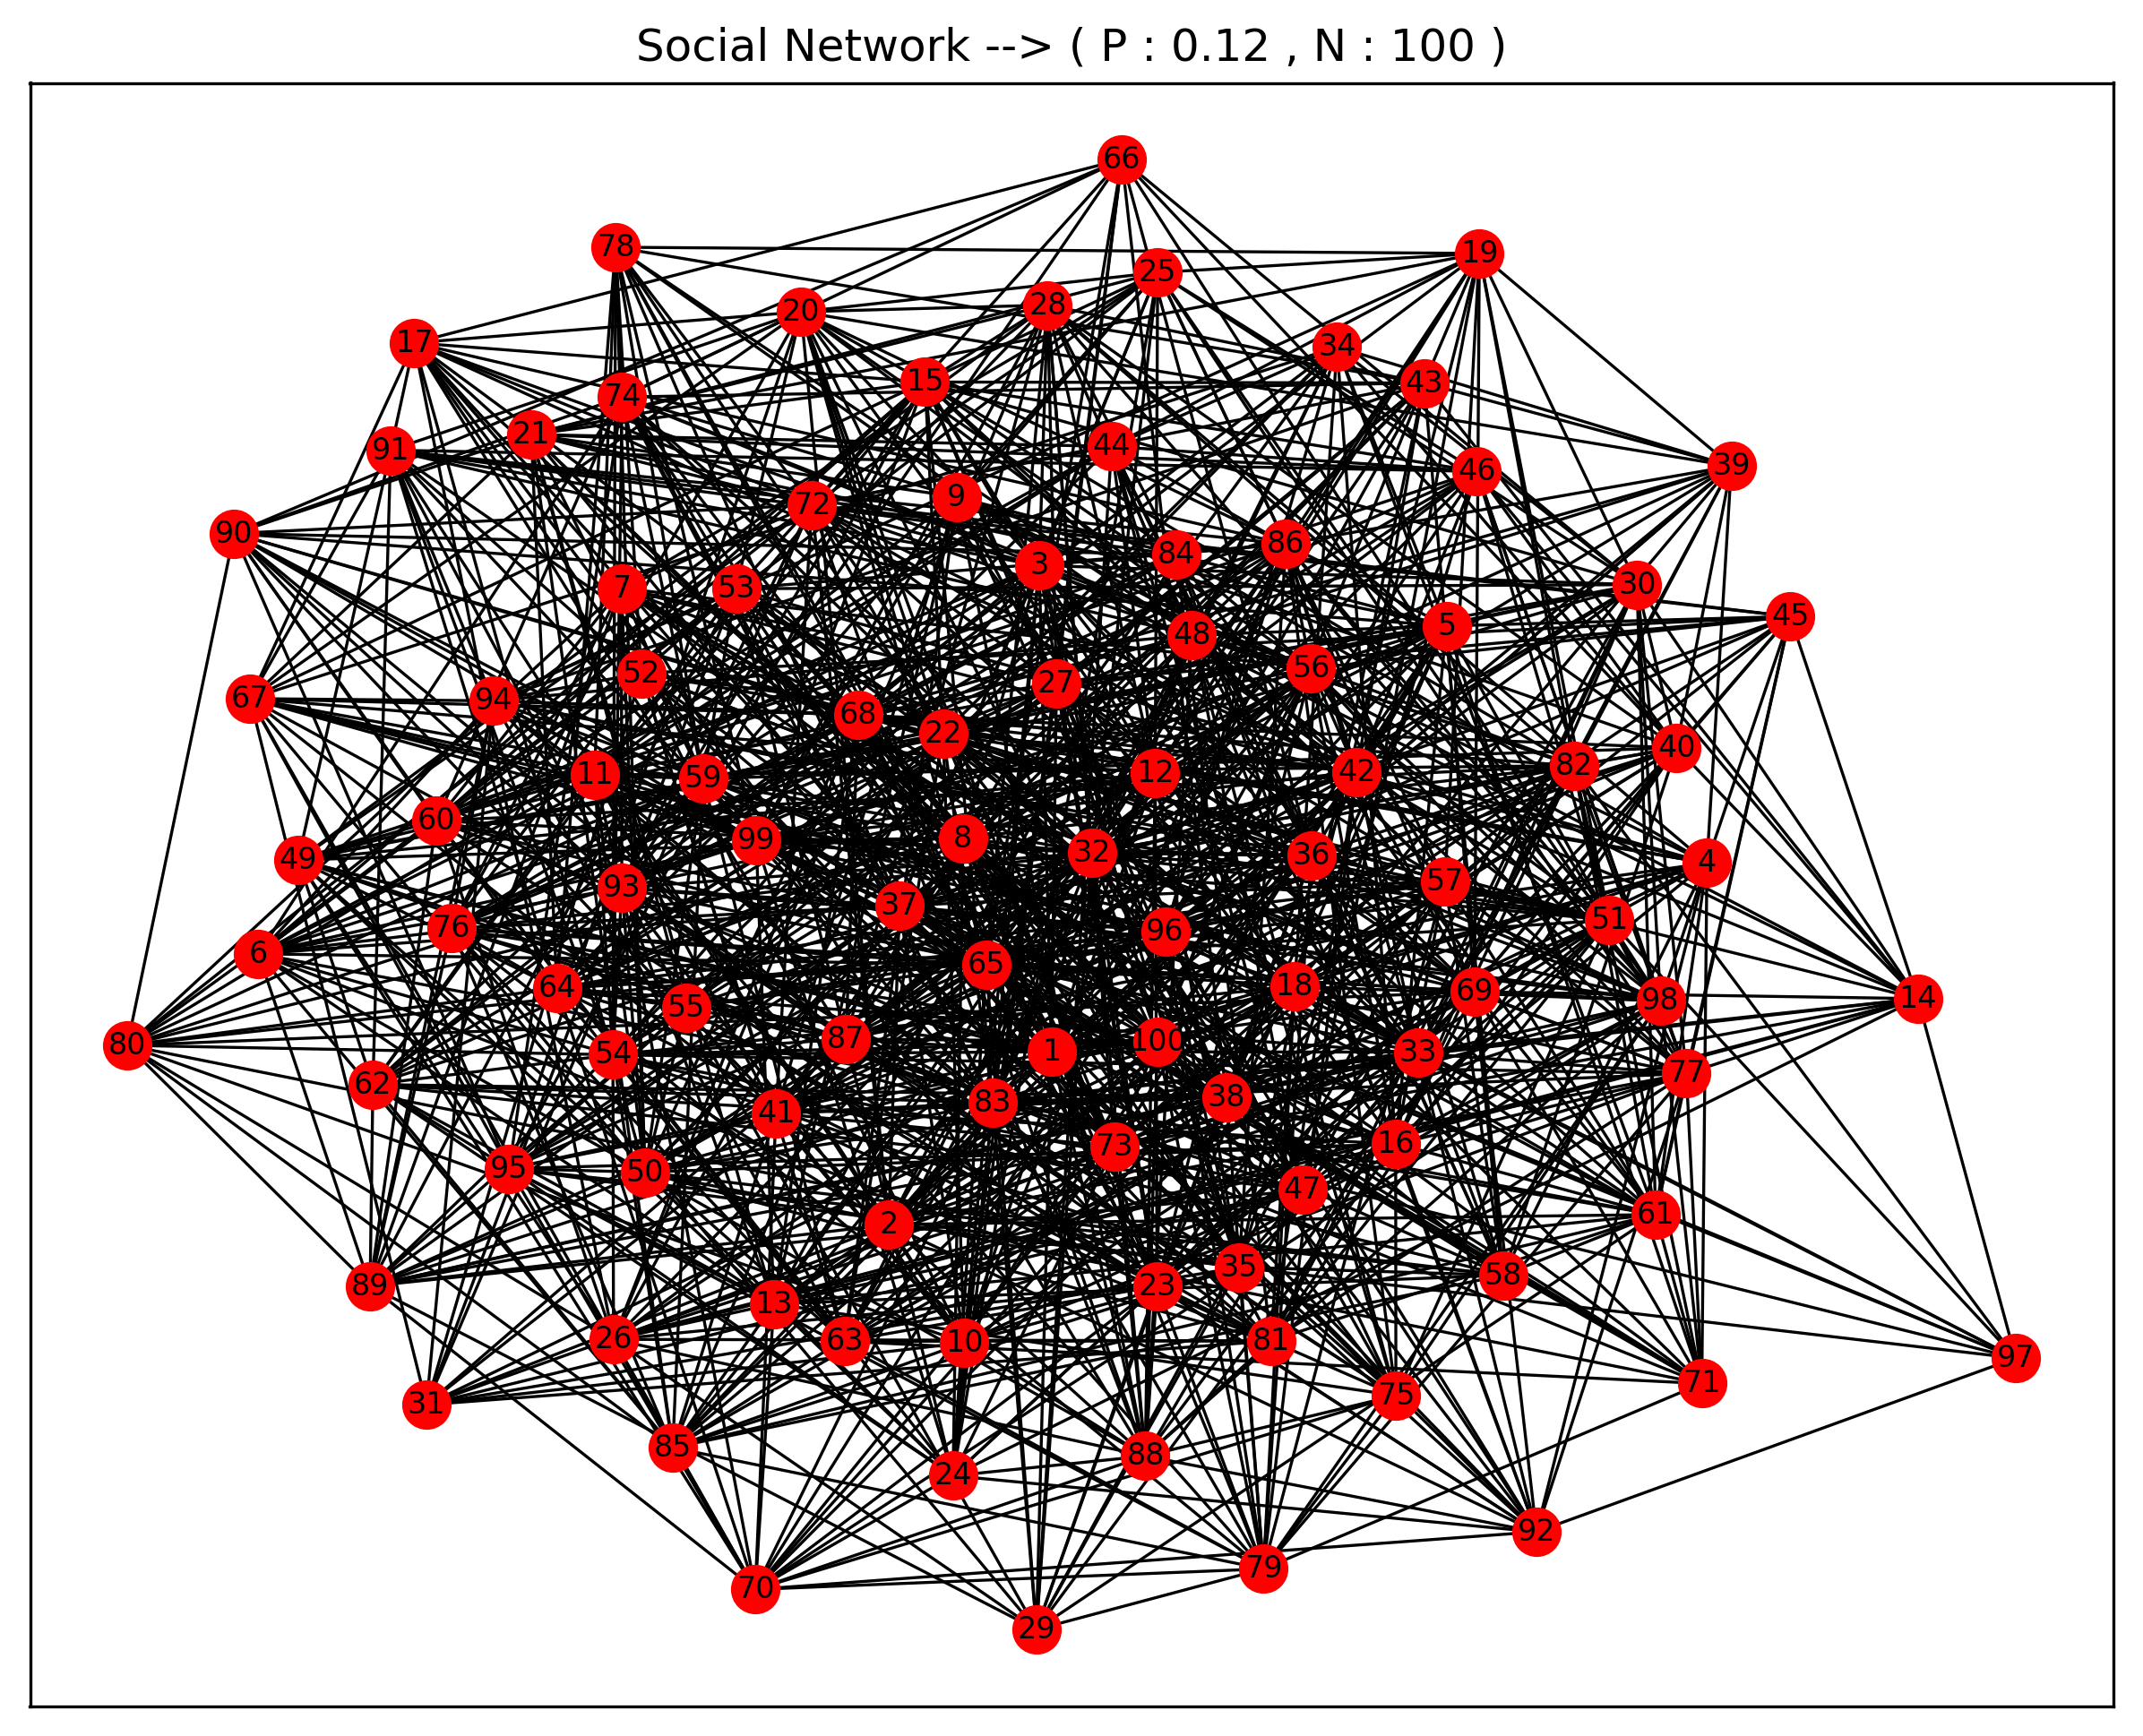

Number of Edges: 1135


In [535]:
num_edges , degree_zip , degree_node = construct_network(100,0.03)
print("Number of Edges:",num_edges)
num_edges , degree_zip , degree_node = construct_network(100,0.12)
print("Number of Edges:",num_edges)

### Summary:
The plots for 3 network samples for p = 0.03 and p = 0.12 were generated using N nodes = 25, 50 and 100.

### Results:
We observe that we get a sparse graph for p = 0.03 and a fully-connected dense graph for p = 0.12.

C:\Users\ishan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


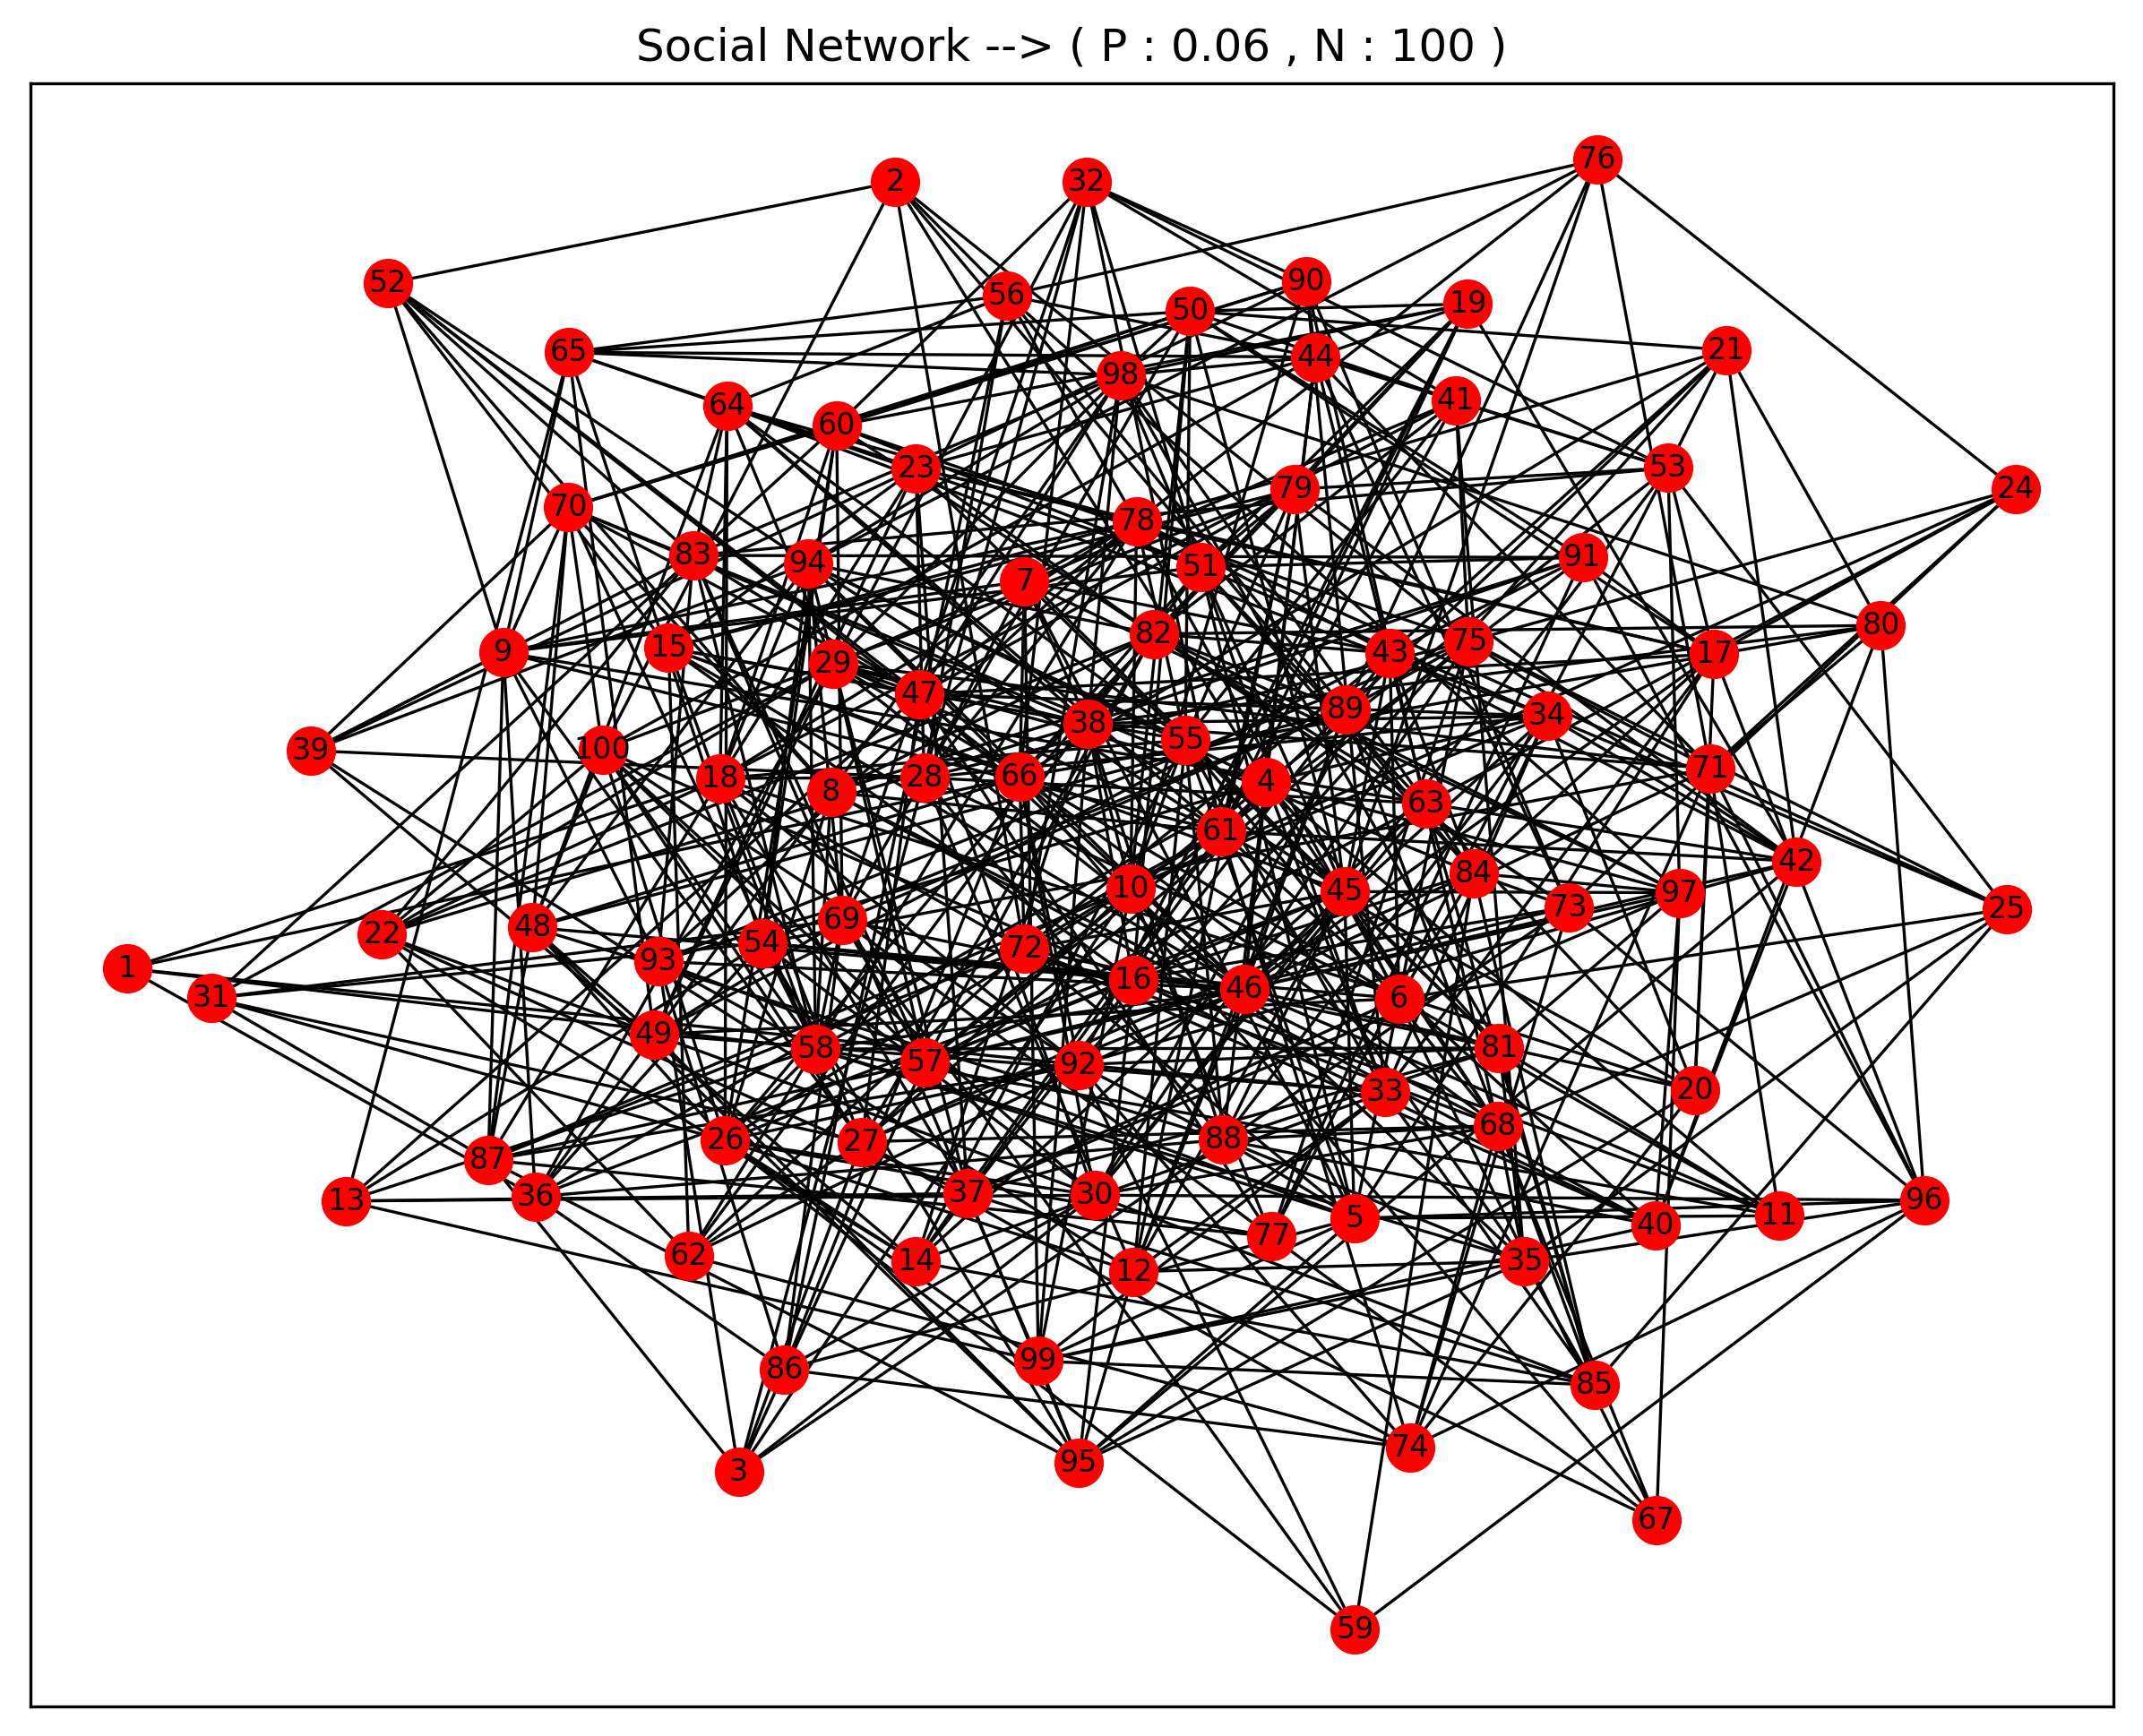

Number of Edges: 614 

Degrees for each node in the form (Node i, Degree of Node i): 
 [(1, 5), (2, 7), (3, 8), (4, 16), (5, 15), (6, 12), (7, 10), (8, 11), (9, 13), (10, 13), (11, 8), (12, 12), (13, 9), (14, 10), (15, 12), (16, 14), (17, 13), (18, 16), (19, 11), (20, 9), (21, 9), (22, 10), (23, 13), (24, 7), (25, 8), (26, 17), (27, 14), (28, 14), (29, 18), (30, 16), (31, 7), (32, 12), (33, 12), (34, 14), (35, 13), (36, 11), (37, 11), (38, 18), (39, 8), (40, 9), (41, 10), (42, 12), (43, 13), (44, 13), (45, 20), (46, 21), (47, 15), (48, 12), (49, 11), (50, 14), (51, 16), (52, 10), (53, 12), (54, 14), (55, 18), (56, 10), (57, 13), (58, 18), (59, 5), (60, 13), (61, 20), (62, 8), (63, 12), (64, 11), (65, 10), (66, 18), (67, 6), (68, 14), (69, 13), (70, 13), (71, 13), (72, 13), (73, 13), (74, 10), (75, 16), (76, 7), (77, 11), (78, 19), (79, 12), (80, 8), (81, 13), (82, 15), (83, 12), (84, 14), (85, 11), (86, 8), (87, 12), (88, 14), (89, 12), (90, 11), (91, 10), (92, 14), (93, 10), (94, 16),

In [560]:
num_edges , degree_zip , degree_node = construct_network(100,0.06)
print("Number of Edges:",num_edges,"\n")
print("Degrees for each node in the form (Node i, Degree of Node i): \n", degree_zip)

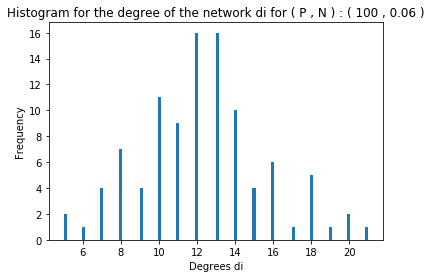

In [561]:
observed , binning_info , patch_info = plt.hist(degree_node,bins=100)
p = 100
n = 0.06
plt.title( "Histogram for the degree of the network di for ( P , N ) : ( "
             +str(p)+" , "+str(n)+" )" )
plt.xlabel("Degrees di")
plt.ylabel("Frequency")
plt.show()

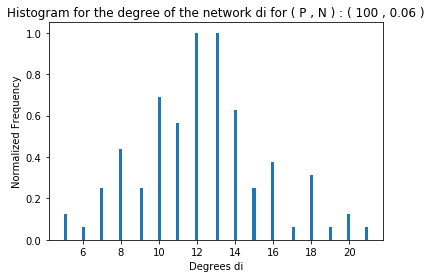

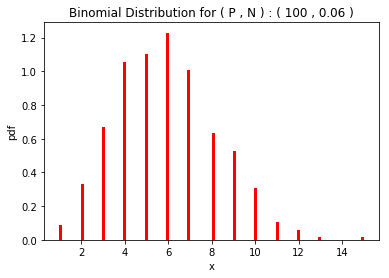

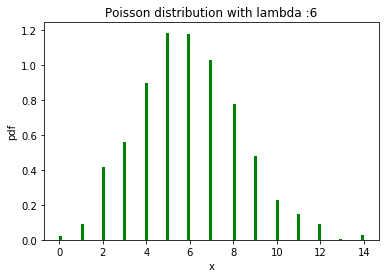

In [562]:
plt.hist(degree_node,bins=100,density=True)
plt.title( "Histogram for the degree of the network di for ( P , N ) : ( "
             +str(p)+" , "+str(n)+" )" )
plt.xlabel("Degrees di")
plt.ylabel("Normalized Frequency")
plt.show()

data_binom = binom.rvs(n=100,p=0.06,size=1000)
plt.hist(data_binom,bins=100, color = "red",density=True)
plt.title( "Binomial Distribution for ( P , N ) : ( "
             +str(p)+" , "+str(n)+" )" )
plt.xlabel("x")
plt.ylabel("pdf")
plt.show()

data_poisson = poisson.rvs(mu=6, size=1000)
plt.hist(data_poisson,bins=100, color = "green",density=True)
plt.title( "Poisson distribution with lambda :"+str(6))
plt.xlabel("x")
plt.ylabel("pdf")
plt.show()

### Summary:
1. A Network with (n, p) = (100, 0.06) was generated and the histogram of degrees was plotted above.

### Results:
1. The network is densely connected but not as densely connected as the above network graph with configuration of (n,p) = (100,0.12).
2. Using the Histogram Goodness-of-fit we eyeball and observe that all distributions have similar shapes with their mean and peak values shifted to the left in comparison to the orginal histogram of degrees for the network.
3. Hence, this is what we infer from the above plots.